In [4]:
# Import library
# http://ufldl.stanford.edu/wiki/index.php/Independent_Component_Analysis
# http://ufldl.stanford.edu/tutorial/unsupervised/ICA/
# http://ufldl.stanford.edu/tutorial/unsupervised/ExerciseRICA/
import tensorflow as tf
import numpy as np
import sys, os,cv2
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle
import matplotlib.animation as animation
import seaborn as sns

plt.style.use('seaborn-white')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
np.random.seed(6278)
tf.set_random_seed(6728)
ia.seed(6278)

In [5]:
# Read the Data and Shuffle it and Set and center it 
from sklearn.datasets import fetch_olivetti_faces
from skimage.transform import rescale, resize
dataset = fetch_olivetti_faces(shuffle=True)
train_data  = dataset.data.reshape(400,64,64)
print('---- Before Centering -------')
print(train_data.shape)
print(train_data.min(),train_data.max())
print(train_data.mean(),train_data.std())

shuffle_index = np.random.permutation(len(train_data))
train_data = train_data[shuffle_index]

print('---- After Centering and reshaping -------')
train_data  = (train_data-train_data.mean(1)[:,np.newaxis]).reshape(400,64,64)
print(train_data.shape)
print(train_data.min(),train_data.max())
print(train_data.mean(),train_data.std())

---- Before Centering -------
(400, 64, 64)
0.0 1.0
0.54704237 0.17251529


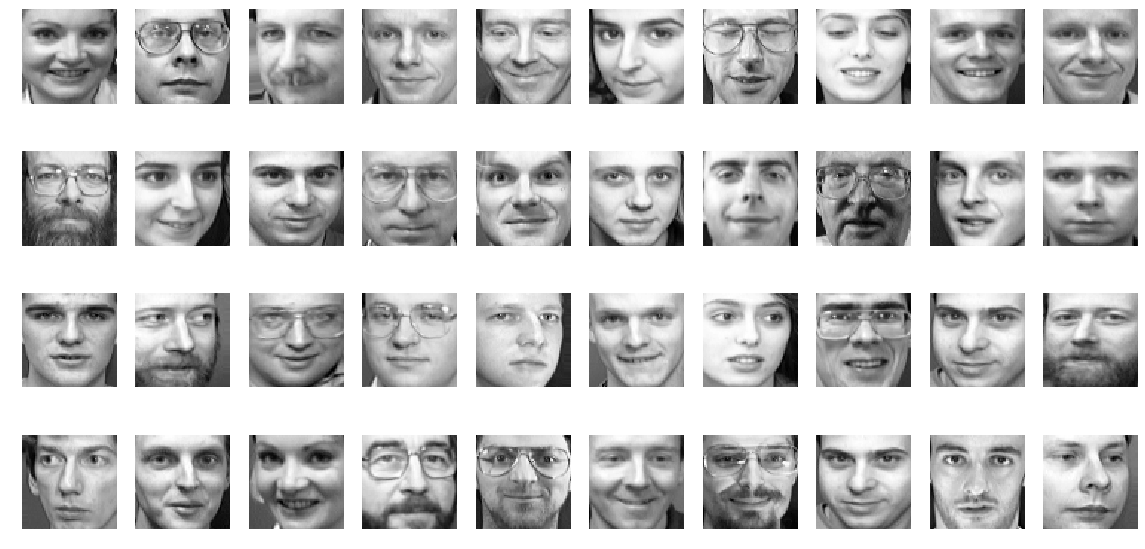

In [6]:
# show the image of the faces
fig=plt.figure(figsize=(20, 10))
columns = 10; rows = 4
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(train_data[i-1],cmap='gray')
plt.show()